In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [6]:
readData = pd.read_csv('data_reg.csv')

In [7]:
# dividing data into sets
trainingSet = readData[:120]
validatingSet = readData[120:160]
testingSet = readData[160:]

In [8]:
trainingSet

,x1,x2,y
0,0.548814,0.311796,0.547818
1,0.715189,0.696343,0.576032
2,0.602763,0.377752,0.113475
3,0.544883,0.179604,1.072286
4,0.423655,0.024679,0.624525
...,...,...,...
115,0.396506,0.245367,0.493161
116,0.881103,0.420539,1.418913
117,0.581273,0.557369,0.129485
118,0.881735,0.860551,2.578728


In [9]:
validatingSet

,x1,x2,y
120,0.725254,0.270328,0.486485
121,0.501324,0.131483,0.813994
122,0.956084,0.055374,2.835160
123,0.643990,0.301599,-0.304306
124,0.423855,0.262118,0.775401
125,0.606393,0.456141,0.261249
126,0.019193,0.683281,1.994160
127,0.301575,0.695625,0.742481
128,0.660174,0.283519,0.901669
129,0.290078,0.379927,0.515408


In [10]:
testingSet

,x1,x2,y
160,0.697429,0.187131,-0.265093
161,0.453543,0.903984,0.963340
162,0.722056,0.543806,-0.505522
163,0.866382,0.456911,1.081916
164,0.975522,0.882041,2.853150
165,0.855803,0.458604,0.919664
166,0.011714,0.724168,3.504923
167,0.359978,0.399025,0.744238
168,0.729991,0.904044,2.004784
169,0.171630,0.690025,0.817609


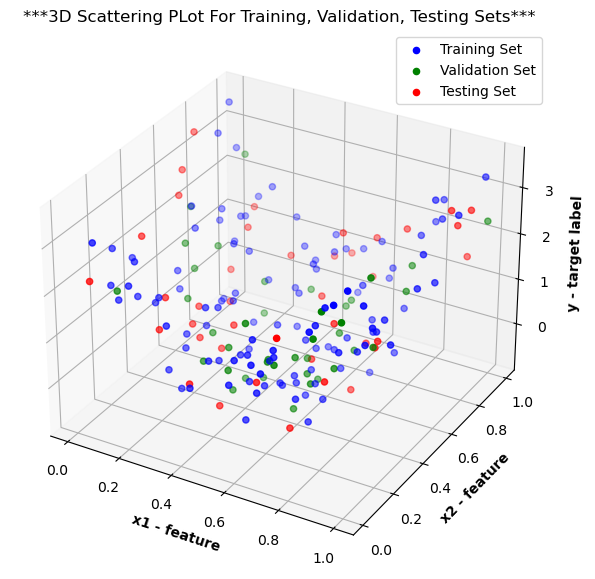

In [23]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# 3D Scatter plot for training set
ax.scatter(trainingSet['x1'], trainingSet['x2'], trainingSet['y'], c='blue', label='Training Set')

# 3D Scatter plot for validation set
ax.scatter(validatingSet['x1'], validatingSet['x2'], validatingSet['y'], c='green', label='Validation Set')

# 3D Scatter plot for testing set
ax.scatter(testingSet['x1'], testingSet['x2'], testingSet['y'], c='red', label='Testing Set')

ax.set_xlabel('x1 - feature',fontweight ='bold')
ax.set_ylabel('x2 - feature',fontweight ='bold')
ax.set_zlabel('y - target label',fontweight ='bold')

plt.title("***3D Scattering PLot For Training, Validation, Testing Sets***")
ax.legend()
plt.show()

In [95]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [96]:
# Trainig set
trainingSetX_axis = trainingSet[['x1','x2']]
trainingSetY_axis = trainingSet['y']

# Validation set
ValidatingSetX_axis = validatingSet[['x1','x2']]
ValidatingSetY_axis = validatingSet['y']

In [97]:
trainingSetX_axis

,x1,x2
0,0.548814,0.311796
1,0.715189,0.696343
2,0.602763,0.377752
3,0.544883,0.179604
4,0.423655,0.024679
...,...,...
115,0.396506,0.245367
116,0.881103,0.420539
117,0.581273,0.557369
118,0.881735,0.860551


In [98]:
trainingSetY_axis

0      0.547818
1      0.576032
2      0.113475
3      1.072286
4      0.624525
         ...   
115    0.493161
116    1.418913
117    0.129485
118    2.578728
119   -0.741409
Name: y, Length: 120, dtype: float64

In [99]:
# setting polynomial
ploynomialDegrees = np.arange(1, 11)

C:\Users\Ho182\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\Ho182\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\Ho182\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\Ho182\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\Ho182\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\Ho182\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X d

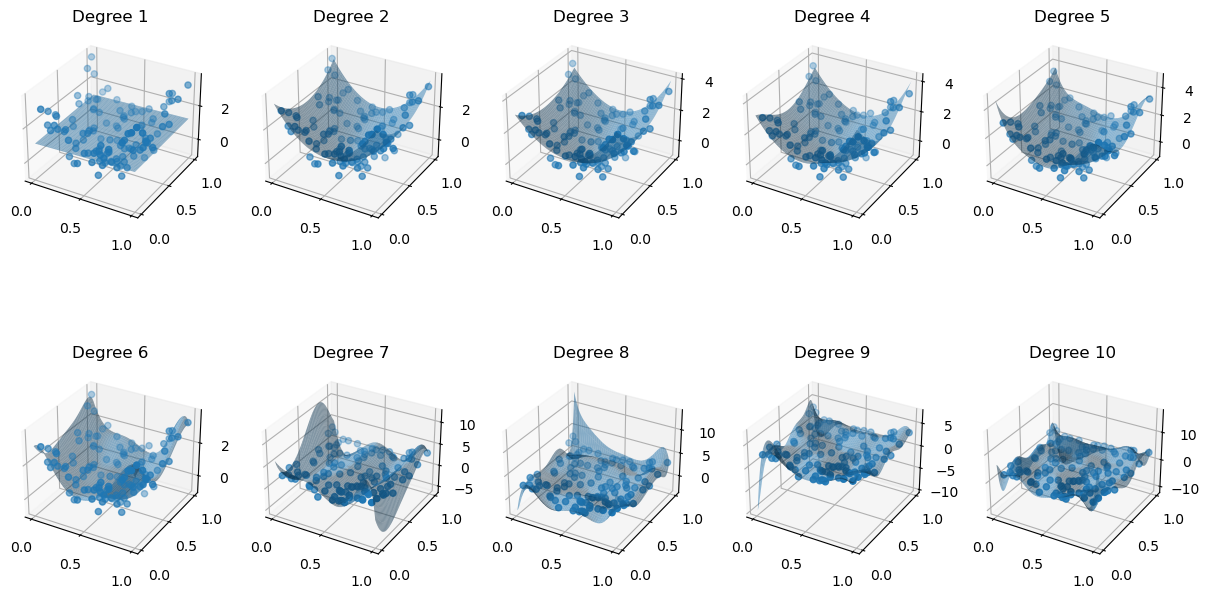

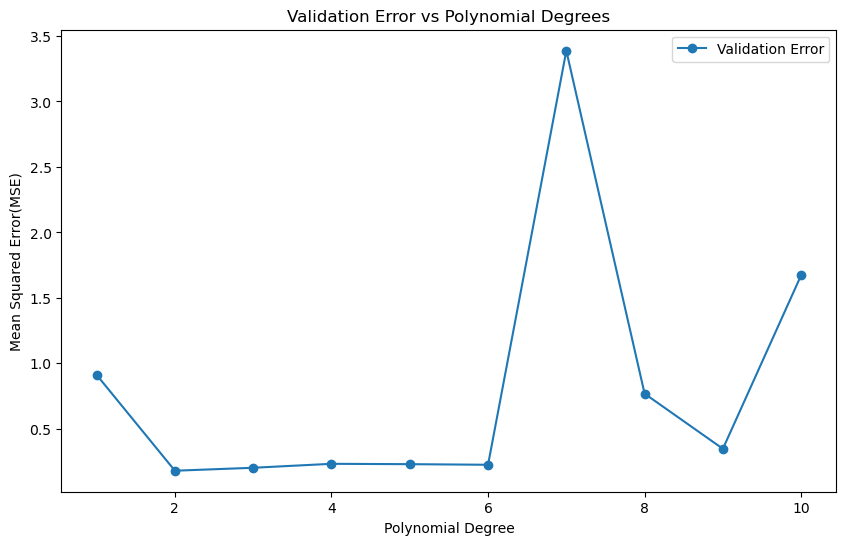

In [110]:
# to store the MSE values for both sets ( training and validating sets)
trainingMSEList = []
validatingMSEList = []
fig, axs = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'projection': '3d'})

# lopping through the 1-10 degrees
for i, d in enumerate(ploynomialDegrees,1):
    # using the PolynomialFeatures()
    polynomial = PolynomialFeatures(degree=d)
    polynomialTrainingX_axis = polynomial.fit_transform(trainingSetX_axis)
    polynomialValidatingX_axis = polynomial.transform(ValidatingSetX_axis)
    # fitting using the LinearRegression()
    model = LinearRegression()
    model.fit(polynomialTrainingX_axis, trainingSetY_axis)
    # predecting values for both validating and training sets
    predictionTrainingY_axis = model.predict(polynomialTrainingX_axis)
    predictionValidatingY_axis = model.predict(polynomialValidatingX_axis) 
    # the next step, calculating the Mean Square Error - MSE
    trainingMSE = mean_squared_error(trainingSetY_axis, predictionTrainingY_axis)
    validatingMSE = mean_squared_error(ValidatingSetY_axis, predictionValidatingY_axis)
    # appending results to the lists
    trainingMSEList.append(trainingMSE)
    validatingMSEList.append(validatingMSE)
    # plotting the surface
    ax = axs.flat[i-1]
    ax.scatter(trainingSetX_axis['x1'], trainingSetX_axis['x2'], trainingSetY_axis, label='Training Set')
    x1Value, x2Value = np.meshgrid(np.linspace(trainingSetX_axis['x1'].min(), trainingSetX_axis['x1'].max(), 100),np.linspace(trainingSetX_axis['x2'].min(), trainingSetX_axis['x2'].max(), 100))
    X_surface = np.c_[x1Value.ravel(), x2Value.ravel()]
    X_surface_poly = polynomial.transform(X_surface)
    y_surface = model.predict(X_surface_poly)
    ax.plot_surface(x1Value, x2Value, y_surface.reshape(x1_vals.shape), alpha=0.5)
    ax.set_title(f'Degree {d}')
    
plt.figure(figsize=(10, 6))
plt.plot(ploynomialDegrees, validatingMSEList, label='Validation Error', marker='o')
plt.title('Validation Error vs Polynomial Degrees')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error(MSE)')
plt.legend()
plt.show()

In [113]:
from sklearn.linear_model import Ridge

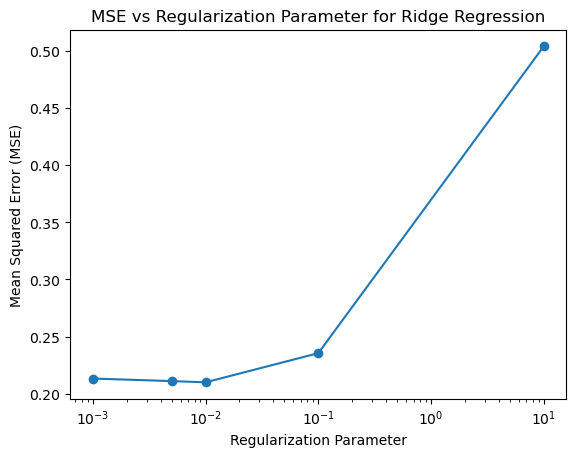

In [132]:
# Feature Extraction for sets
# Training Set
trainingSetX_axis = trainingSet[['x1','x2']]
trainingSetY_axis = trainingSet['y']

# Validation set
ValidatingSetX_axis = validatingSet[['x1','x2']]
ValidatingSetY_axis = validatingSet['y']

# Testing Set
TestingSetX_axis = testingSet[['x1','x2']]
TestingSetY_axis = testingSet['y']

# Using the Polynomial Features for degree 8
poly = PolynomialFeatures(degree=8)
X_train_poly = poly.fit_transform(trainingSetX_axis)
X_val_poly = poly.transform(ValidatingSetX_axis)
X_test_poly = poly.transform(TestingSetX_axis)

# Defining the Ridge() model and parameters
ridge = Ridge()
parameters = [0.001, 0.005, 0.01, 0.1, 10]
MeanSquareValue_List = []
# loop on the paramters value in order to calculate the regession values and finding MSE
for p in parameters:
    ridge.alpha = p
    ridge.fit(X_train_poly, trainingSetY_axis)
    y_val_pred = ridge.predict(X_val_poly)
    MeanSquareValue_List.append(mean_squared_error(ValidatingSetY_axis, y_val_pred))

# Plotting the MSE Vs Paramters 
plt.plot(parameters, MeanSquareValue_List, marker='o')
plt.xscale('log')
plt.xlabel('Regularization Parameter')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs Regularization Parameter for Ridge Regression')
plt.show()

In [133]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [160]:
# reading the training and testing data
trainingData = pd.read_csv('train_cls.csv')
testingData = pd.read_csv('test_cls.csv')

In [161]:
le = LabelEncoder()
trainingData['class'] = le.fit_transform(trainingData['class'])
testingData['class'] = le.transform(testingData['class'])

# extracting features for both training and testing data
trainingX = trainingData[['x1', 'x2']]
trainingY= trainingData['class']
#---
testingX = testingData[['x1', 'x2']]
testingY= testingData['class']

In [158]:
# Training and Plotting Logistic Regression Model
def train_and_plot(X, y, degree, title):
    
    # Polynomial features using PolynomialFeatures() function
    poly = PolynomialFeatures(degree=degree)
    PloyX = poly.fit_transform(X)

    # Training logistic regression modelusing LogisticRegression() function
    modelTraining = LogisticRegression()
    modelTraining.fit(PloyX, y)

    plt.figure(figsize=(8, 6))
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='viridis', edgecolors='k', marker='o', s=100, label='Data')

    h = .02  # step siz ein mesh
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = modelTraining.predict(poly.transform(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)

    contour = plt.contour(xx, yy, Z, levels=[0.5], linewidths=[2], colors=['r'])

    plt.title(title)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()
    plt.show()

    return modelTraining

C:\Users\Ho182\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


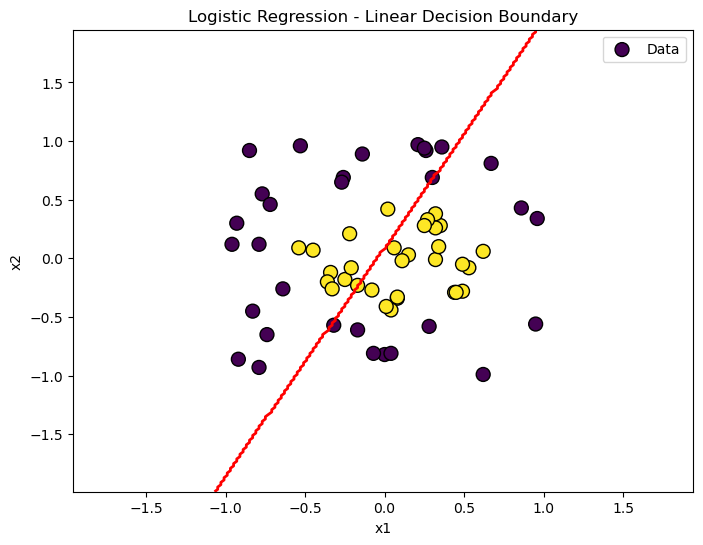

Training Accuracy for Linear Decision Boundary : 0.66
Testing Accuracy for Linear Decision Boundary: 0.68


In [163]:
# Train and plot logistic regression with linear decision boundary
model_linear = train_and_plot(trainingX, trainingY, degree=1, title='Logistic Regression - Linear Decision Boundary')
X_test_poly = PolynomialFeatures(degree=1).fit_transform(testingX)
# Evaluate linear model on testing and training set, accuracy
predictTestingLinear_Y = model_linear.predict(X_test_poly)
accuracyTestingLinear = accuracy_score(testingY, predictTestingLinear_Y)
predictTrainingLinear_Y = model_linear.predict(PolynomialFeatures(degree=1).fit_transform(trainingX))
accuracyTrainingLinear = accuracy_score(trainingY, predictTrainingLinear_Y)
print(f"Training Accuracy for Linear Decision Boundary : {accuracyTrainingLinear:.2f}")
print(f"Testing Accuracy for Linear Decision Boundary: {accuracyTestingLinear:.2f}")


C:\Users\Ho182\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


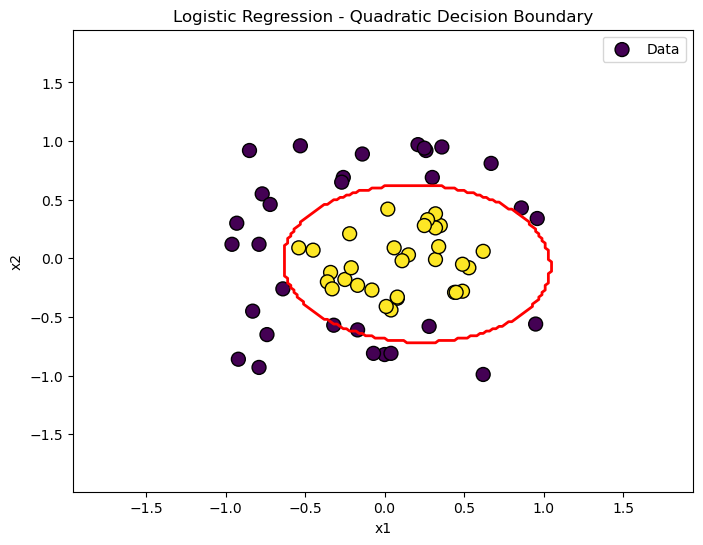

Training Accuracy for Quadratic Decision Boundary: 0.97
Testing Accuracy for Quadratic Decision Boundary: 0.95


In [170]:
# -------------------------------------------------------------------
model_quadratic = train_and_plot(trainingX, trainingY, degree=2, title='Logistic Regression - Quadratic Decision Boundary')
X_test_poly = PolynomialFeatures(degree=2).fit_transform(testingX)
predictTestingQuadratic_Y = model_quadratic.predict(X_test_poly)
accuracyTestingQuadratic = accuracy_score(testingY, predictTestingQuadratic_Y)
predictTrainingQuadratic_Y = model_quadratic.predict(PolynomialFeatures(degree=2).fit_transform(trainingX))
accuracyTrainingQuadratic = accuracy_score(trainingY, predictTrainingQuadratic_Y)
print(f"Training Accuracy for Quadratic Decision Boundary: {accuracyTrainingQuadratic:.2f}")
print(f"Testing Accuracy for Quadratic Decision Boundary: {accuracyTestingQuadratic:.2f}")